In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Notes on gas prices

1. Gather data for nominal price of gas standardize on yearly price
2. cleaning and transforming
3. adjust prices for inflation
4. graph the nominal and adjusted prices
5. choose some other item with historical prices to compare to gas.

The beautiful soup functions and attributes we will use in this exercise include:

* xxx.find_all('some tag')   -- this gives us a list of matching tags
* xxx.contents  -- gives us the contents of a particular match -- also a list


The first thing we need to do is get the text of the web page and have BeautifulSoup parse it for us.

In [42]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text, "lxml")

In [3]:
print(soup.prettify())[0:10]

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="en-us" http-equiv="Content-Language"/>
  <meta content="all" name="robots"/>
  <meta content="EIA - Energy Information Administration" name="agency"/>
  <meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
  <meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
  <link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
  <link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/global/styles/EIA_global.css" media="screen, projecti

TypeError: 'NoneType' object is not subscriptable

#### Start by finding all of the table rows in the document

In [43]:
allrows = soup.find_all("tr")

In [6]:
allrows

[<tr><td colspan="13" style="border:1;">Table 5.24  Retail Motor Gasoline and On-Highway Diesel Fuel Prices, 1949-2011<br/>                       (Dollars per Gallon)</td></tr>,
 <tr><td colspan="1" rowspan="3"><br/><br/><br/><br/><br/>Year</td>
 <td colspan="8" rowspan="1">Motor Gasoline by Grade</td>
 <td colspan="3" rowspan="1">Regular Motor Gasoline by Area Type</td>
 <td colspan="1" rowspan="2"><br/><br/>On-Highway<br/>Diesel Fuel </td>
 </tr>,
 <tr>
 <td colspan="2" rowspan="1"><br/>Leaded Regular </td>
 <td colspan="2" rowspan="1"><br/>Unleaded Regular</td>
 <td colspan="2" rowspan="1"><br/>Unleaded Premium</td>
 <td colspan="2" rowspan="1"><br/>All  Grades</td>
 <td colspan="1" rowspan="1">Conventional<br/>Gasoline Areas <sup>1</sup><sup>,2</sup></td>
 <td colspan="1" rowspan="1">Reformulated<br/>Gasoline Areas <sup>3</sup><sup>,4</sup></td>
 <td colspan="1" rowspan="1"><br/>All Areas</td>
 </tr>,
 <tr>
 <td colspan="1" rowspan="1">Nominal <sup>5</sup></td>
 <td colspan="1" row

# Format of our output:

The result will be a dictionary with two keys **year** and **price**

```
{ 'year': [1949, 1950, ... ], 'price': [.28, .32, ....] }
```

### Look at the format of one row

In [7]:
allrows[4]

<tr>
<td colspan="1">1949</td>
<td colspan="1">
0.268</td>
<td colspan="1">
<sup>R </sup>1.848</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
</tr>

### We can get all the cells for one row by using find_all again using the current row as the starting point.  And searching on on the td tag.

* Now we notice that the year is always in column 0
* prior to 1990 the price we want is in column 1 otherwise column 3
* After getting some errors on differnt columns I noticed that some columns have the weird superscript characters, they always come before the price.  So the price is always the last thing in the contents list.  hence the indexing by -1

In [8]:
onerow = allrows[4].find_all('td')

In [44]:
rawdata = {'year':[], 'price':[]}
allrows = soup.find_all("tr")
for row in allrows[4:4+2011-1949+1]:
    el = row.find_all('td')
    year = el[0].contents[0]
    if year < '1990':
        price = el[1].contents[-1]
    else:
        price = el[3].contents[-1]
    try:
       iyear = int(year.strip())
    except:
       iyear = -99
       print("bad data for year", year)
    try:
       fprice = float(price.strip())
    except:
       print("bad data for price", price)

    rawdata['year'].append(iyear)
    rawdata['price'].append(fprice)


In [10]:
rawdata

{'price': [0.268,
  0.268,
  0.272,
  0.274,
  0.287,
  0.29,
  0.291,
  0.299,
  0.31,
  0.304,
  0.305,
  0.311,
  0.308,
  0.306,
  0.304,
  0.304,
  0.312,
  0.321,
  0.332,
  0.337,
  0.348,
  0.357,
  0.364,
  0.361,
  0.388,
  0.532,
  0.567,
  0.59,
  0.622,
  0.627,
  0.857,
  1.191,
  1.311,
  1.222,
  1.158,
  1.129,
  1.115,
  0.857,
  0.897,
  0.9,
  0.997,
  1.164,
  1.14,
  1.127,
  1.108,
  1.112,
  1.147,
  1.231,
  1.234,
  1.059,
  1.165,
  1.51,
  1.461,
  1.358,
  1.591,
  1.88,
  2.295,
  2.589,
  2.801,
  3.266,
  2.35,
  2.788,
  3.527],
 'year': [1949,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,


In [46]:
df = pd.DataFrame(rawdata)
df.head(10)

,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


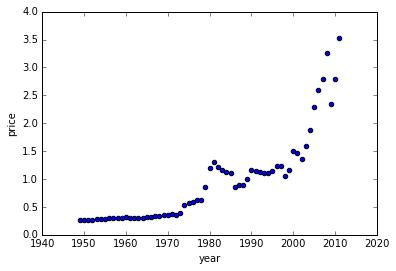

In [48]:
#df.plot?
df.plot(x='year',y='price',kind='scatter')


In [49]:
pd.read_excel?
cpi = pd.read_excel('SeriesReport-20160814164540_b2eb0f.xlsx',skiprows=range(9),header=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN


In [51]:
cols = list(cpi)
cols.remove('Year')
cols.remove('HALF1')
cols.remove('HALF2')
cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [53]:
cpi[['Jan','Sep']].head()

,Jan,Sep
0,30.9,31.1
1,31.2,31.6
2,31.8,32.7
3,32.9,33.6
4,34.1,35.1


In [54]:
cpi['YEAR'] = cpi[cols].mean(axis=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
48,2012,226.665,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601,228.850,230.338,229.593917
49,2013,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049,232.366,233.548,232.957083
50,2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812,236.384,237.088,236.736167
51,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525,236.265,237.769,237.017000
52,2016,236.916,237.111,238.132,239.261,240.236,241.038,NaN,NaN,NaN,NaN,NaN,NaN,238.782,NaN,238.782333


In [55]:
cpi = cpi.set_index(keys='Year')
#cpi[cpi.Year==1966]['YEAR']
cpi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
Year,,,,,,,,,,,,,,,
1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667
1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333
1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333
1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333
1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333


In [56]:
cpi.ix[1972]

Jan      41.100000
Feb      41.300000
Mar      41.400000
Apr      41.500000
May      41.600000
Jun      41.700000
Jul      41.900000
Aug      42.000000
Sep      42.100000
Oct      42.300000
Nov      42.400000
Dec      42.500000
HALF1          NaN
HALF2          NaN
YEAR     41.816667
Name: 1972, dtype: float64

Now lets use the formula $\frac{x}{oldprice} = \frac{nowCPI}{oldCPI}$

A little algebra will tell us that $x = \frac{nowCPI}{oldCPI} \cdot oldprice$

Try an example:  Convert the gas price for 1964  (.30) into today's dollars

In [19]:
nowcpi = 238.78
oldcpi = 31.01

nowcpi/oldcpi * 0.3

2.31002902289584

So the price of gas in 1964 is equivalent to  $2.31  in today's dollars?  Looking at only that datapoint, its pretty amazing that the cost of gas has hardly changed.

But lets combine our two dataframes and graph the adjusted price over time.

One simple way to accomplish this is to merge the CPI from the cpi dataframe into the gas price dataframe.

In [57]:
adj = df.merge(right=cpi,left_on='year', right_index=True)
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333


In [59]:
adj.price * 238.78/adj.YEAR

15    2.340326
16    2.364434
17    2.361439
18    2.376466
19    2.313432
20    2.265210
21    2.195607
22    2.146514
23    2.061369
24    2.086636
25    2.576257
26    2.515731
27    2.475564
28    2.450507
29    2.295070
30    2.819627
31    3.450949
32    3.442844
33    3.023722
34    2.776177
35    2.595052
36    2.475113
37    1.866961
38    1.885022
39    1.817225
40    1.920384
41    2.127227
42    1.998721
43    1.917841
44    1.831450
45    1.791353
46    1.797314
47    1.874008
48    1.835663
49    1.551258
50    1.669991
51    2.093832
52    1.970205
53    1.802714
54    2.065136
55    2.376633
56    2.806060
57    3.066602
58    3.225692
59    3.622139
60    2.615553
61    3.052978
62    3.744021
dtype: float64

In [65]:
adj['adj_price'] = adj.price * 238.78/adj.YEAR
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR,adj_price
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667,2.340326
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333,2.364434
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333,2.361439
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333,2.376466
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333,2.313432


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf16307d30>], dtype=object)

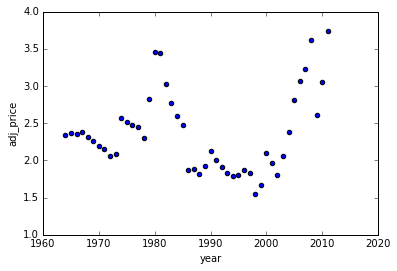

In [66]:
adj.plot(x='year', y='adj_price', kind='scatter')

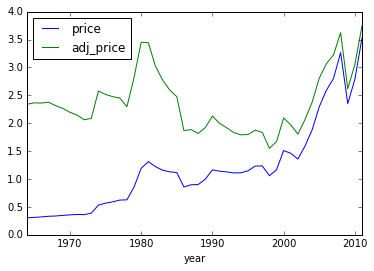

In [67]:
xx = adj[['price','adj_price']]
xx.index = adj.year
xx.plot()

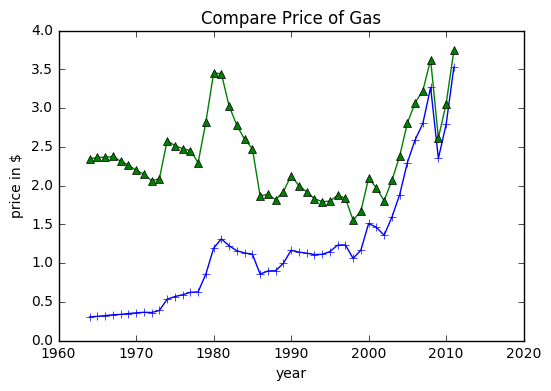

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(adj['year'], adj['price'], marker='+', color='b')
ax.plot(adj['year'], adj['adj_price'], marker='^', color='g')
ax.set_ylabel('price in $')
ax.set_xlabel('year')
ax.set_title('Compare Price of Gas')

In [68]:
adj.to_excel('testing.xlsx')

In [2]:
res = requests.get("http://www.randomuseless.info/gasprice/gasprice.txt")


In [7]:
for line in res.iter_lines():
     print(line)

b'#Date  Gallons  $  $/gallon'
b'#4/25/1979  23.700  00.00  0.0000'
b'04/26/1979  07.500  06.00  0.8000'
b'04/27/1979  10.350  07.75  0.7488'
b'04/29/1979  07.100  05.94  0.8366'
b'04/30/1979  09.310  07.50  0.8056'
b'05/04/1979  13.300  11.20  0.8421'
b'05/07/1979  08.000  06.25  0.7812'
b'05/10/1979  14.500  11.70  0.8069'
b'05/12/1979  06.400  05.20  0.8125'
b'05/15/1979  12.500  10.55  0.8440'
b'05/17/1979  08.600  07.00  0.8140'
b'05/20/1979  14.800  12.60  0.8514'
b'05/25/1979  12.000  10.00  0.8333'
b'05/30/1979  16.900  14.00  0.8284'
b'06/02/1979  18.600  16.00  0.8602'
b'06/04/1979  05.700  05.00  0.8772'
b'06/08/1979  14.300  12.80  0.8951'
b'06/11/1979  15.200  13.50  0.8882'
b'06/14/1979  05.700  05.00  0.8772'
b'06/14/1979  04.600  04.00  0.8696'
b'06/16/1979  03.400  03.00  0.8824'
b'06/18/1979  03.400  03.00  0.8824'
b'06/19/1979  10.000  08.50  0.8500'
b'06/19/1979  03.400  03.00  0.8824'
b'06/21/1979  07.600  06.50  0.8553'
b'06/23/1979  09.200  08.30  0.9022'
b'06/27

In [26]:
np = pd.read_excel('EMM_EPM0_PTE_NUS_DPGw.xls','Data 1',skiprows=[0,1],header=0)
np.columns = ['Date','Price']

In [27]:
np = np.set_index('Date')
np.head()

,Price
Date,
1993-04-05,1.068
1993-04-12,1.079
1993-04-19,1.079
1993-04-26,1.086
1993-05-03,1.086


Object `mean` not found.


In [37]:
summary = np.resample('A').mean()   # see http://stackoverflow.com/questions/17001389/pandas-resample-documentation

In [38]:
#summary.Date.dt.year
summary = summary.reset_index('Date')
summary['year'] = summary.Date.dt.year
summary.head()

,Date,Price,year
0,1993-12-31,1.071154,1993
1,1994-12-31,1.077865,1994
2,1995-12-31,1.157712,1995
3,1996-12-31,1.244528,1996
4,1997-12-31,1.244250,1997


In [39]:
summary.to_dict()

{'Date': {0: Timestamp('1993-12-31 00:00:00'),
  1: Timestamp('1994-12-31 00:00:00'),
  2: Timestamp('1995-12-31 00:00:00'),
  3: Timestamp('1996-12-31 00:00:00'),
  4: Timestamp('1997-12-31 00:00:00'),
  5: Timestamp('1998-12-31 00:00:00'),
  6: Timestamp('1999-12-31 00:00:00'),
  7: Timestamp('2000-12-31 00:00:00'),
  8: Timestamp('2001-12-31 00:00:00'),
  9: Timestamp('2002-12-31 00:00:00'),
  10: Timestamp('2003-12-31 00:00:00'),
  11: Timestamp('2004-12-31 00:00:00'),
  12: Timestamp('2005-12-31 00:00:00'),
  13: Timestamp('2006-12-31 00:00:00'),
  14: Timestamp('2007-12-31 00:00:00'),
  15: Timestamp('2008-12-31 00:00:00'),
  16: Timestamp('2009-12-31 00:00:00'),
  17: Timestamp('2010-12-31 00:00:00'),
  18: Timestamp('2011-12-31 00:00:00'),
  19: Timestamp('2012-12-31 00:00:00'),
  20: Timestamp('2013-12-31 00:00:00'),
  21: Timestamp('2014-12-31 00:00:00'),
  22: Timestamp('2015-12-31 00:00:00'),
  23: Timestamp('2016-12-31 00:00:00')},
 'Price': {0: 1.0711538461538466,
  1: 1.